In [5]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
from pandas import DataFrame,Series


# Add the project directory to sys.path
project_dir = Path.cwd().parent  # Adjust as needed to point to your project root
sys.path.append(str(project_dir))

print("project_dir: ", project_dir)
# Import the module
from utils.pipeline import Pipeline
from utils.dslabs_functions import NR_STDEV, get_variable_types, determine_outlier_thresholds_for_var

dataloader = Pipeline()


e_data, e_target = dataloader.get_security_classification_dataset_and_target()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
project_dir:  /Users/matsalexander/Desktop/kdd-process/src


Evaluation of the models for the security no_outlier_handling dataset
evaluation for ['NB', 'KNN']
{'accuracy': [0.9811133200795229, 0.9721669980119284], 'recall': [1.0, 1.0], 'precision': [0.9808853118712274, 0.9720837487537388], 'auc': [0.6935483870967742, 0.5483870967741935], 'f1': [0.9903504316912138, 0.9858442871587462]}


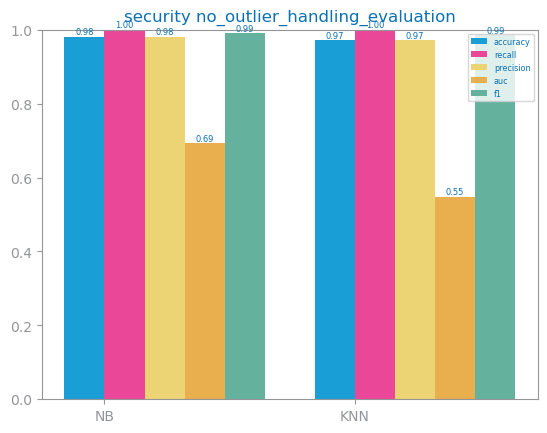

In [6]:
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from utils.dslabs_functions import plot_multibar_chart, evaluate_approach

data = e_data
train, test = train_test_split(data, test_size=0.2, random_state=42)
# scale train and test data
scaler = MinMaxScaler()
train = DataFrame(scaler.fit_transform(train), columns=train.columns)
test = DataFrame(scaler.transform(test), columns=test.columns)



figure()
file_tag = "security no_outlier_handling"

IMAGE_FOLDER = "images_arrests_outliers"
# make sure the folder exists
Path(IMAGE_FOLDER).mkdir(exist_ok=True)

eval: dict[str, list] = evaluate_approach(train, test, target=e_target, metric="recall")
print(f"Evaluation of the models for the {file_tag} dataset")
print("evaluation for " + str(["NB", "KNN"]))
print(eval)
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag}_evaluation", percentage=True
)


path = f"{IMAGE_FOLDER}/{file_tag}_eval.png"

if not Path(path).exists():
    savefig(path)
show()

## lets look at security data

### Remove outliers

In [7]:


data = e_data #.copy(deep=True)
print(f"Data before dropping outliers: {data.shape}")
file_tag = "security_" + e_target
n_std: int = NR_STDEV
numeric_vars: list[str] = get_variable_types(data)["numeric"]
if numeric_vars is not None:
    df: DataFrame = data.copy(deep=True)
    summary5: DataFrame = data[numeric_vars].describe()
    for var in numeric_vars:
        top_threshold, bottom_threshold = determine_outlier_thresholds_for_var(
            summary5[var]
        )
        # print(f"Variable: {var}")
        # print(f"Top threshold: {top_threshold}")
        # print(f"Bottom threshold: {bottom_threshold}")
        outliers: Series = df[(df[var] > top_threshold) | (df[var] < bottom_threshold)]
    print(f"Data after dropping outliers: {df.shape}")
else:
    print("There are no numeric variables")

Data before dropping outliers: (5030, 20)
Data after dropping outliers: (5030, 20)


Data after dropping outliers: (5030, 20)
Evaluation of the models for the security_CLASS__security dataset
evaluation for ['NB', 'KNN']
{'accuracy': [0.9811133200795229, 0.9721669980119284], 'recall': [1.0, 1.0], 'precision': [0.9808853118712274, 0.9720837487537388], 'auc': [0.6935483870967742, 0.5483870967741935], 'f1': [0.9903504316912138, 0.9858442871587462]}


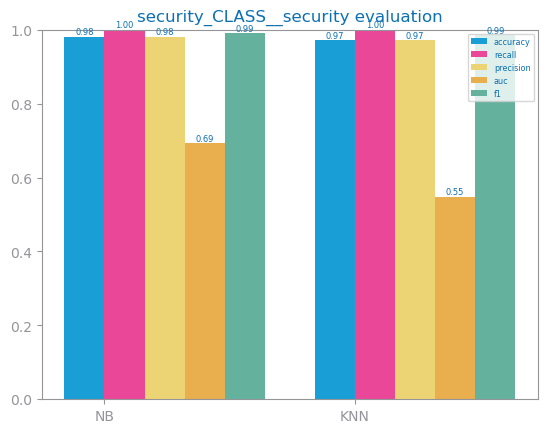

In [8]:
from matplotlib.pyplot import savefig, show, figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from utils.dslabs_functions import plot_multibar_chart, evaluate_approach

train, test = train_test_split(df, test_size=0.2, random_state=42)
# scale train and test data
scaler = MinMaxScaler()
train = DataFrame(scaler.fit_transform(train), columns=train.columns)
test = DataFrame(scaler.transform(test), columns=test.columns)


print(f"Data after dropping outliers: {df.shape}")
figure()
eval: dict[str, list] = evaluate_approach(train, test, target=e_target, metric="recall")
print(f"Evaluation of the models for the {file_tag} dataset")
print("evaluation for " + str(["NB", "KNN"]))
print(eval)
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
file_tag = "security_remove_outliers"
path = f"{IMAGE_FOLDER}/{file_tag}_eval.png"
if not Path(path).exists():
    savefig(path)
show()

### Replace outliers with fixed value


In [9]:
if [] != numeric_vars:
    df: DataFrame = data.copy(deep=True)
    for var in numeric_vars:
        top, bottom = determine_outlier_thresholds_for_var(summary5[var])
        median: float = df[var].median()
        df[var] = df[var].apply(lambda x: median if x > top or x < bottom else x)
    # df.to_csv(f"data/{file_tag}_replacing_outliers.csv", index=True)
    print("Data after replacing outliers:", df.shape)
    
else:
    print("There are no numeric variables")
if [] == numeric_vars:
    exit()
df.describe()

Data after replacing outliers: (5030, 20)


,PD_CD,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,CLASS__security,YEAR,MONTH,DAY_OF_WEEK,IS_WEEKEND,DAY_OF_YEAR_sin,DAY_OF_YEAR_cos
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000
mean,486.807555,249.706759,9.441750,37.974155,0.294433,1.810934,61.006362,0.238370,1.926441,0.815507,1.292644,40.742584,-73.922660,0.973559,2012.149304,6.283499,2.864414,0.222068,0.039615,-0.033662
std,254.492705,99.420699,6.416238,38.930126,0.455833,1.522105,34.332025,0.873506,0.658213,0.387924,0.788820,0.080448,0.051807,0.160460,3.944960,3.360424,1.812417,0.415678,0.717964,0.694312
min,101.000000,101.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,40.502746,-74.068611,0.000000,2006.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000
25%,259.000000,121.000000,4.000000,10.000000,0.000000,0.000000,33.000000,0.000000,1.000000,1.000000,1.000000,40.679981,-73.956378,1.000000,2009.000000,3.000000,1.000000,0.000000,-0.686000,-0.716000
50%,503.000000,235.000000,8.000000,24.000000,0.000000,1.000000,60.000000,0.000000,2.000000,1.000000,1.000000,40.741776,-73.924718,1.000000,2012.000000,6.000000,3.000000,0.000000,0.120000,-0.060000
75%,661.000000,344.000000,13.000000,55.000000,1.000000,3.000000,84.000000,0.000000,2.000000,1.000000,2.000000,40.816089,-73.892870,1.000000,2015.000000,9.000000,4.000000,0.000000,0.757000,0.641000
max,969.000000,364.000000,27.000000,184.000000,1.000000,4.000000,123.000000,15.000000,3.000000,1.000000,3.000000,40.915048,-73.777442,1.000000,2020.000000,12.000000,6.000000,1.000000,1.000000,1.000000


Evaluation of the models for the fix outliers_econmical_classification dataset
evaluation for ['NB', 'KNN']
{'accuracy': [0.9691848906560636, 0.9691848906560636], 'recall': [1.0, 1.0], 'precision': [0.9691848906560636, 0.9691848906560636], 'auc': [0.5, 0.5], 'f1': [0.9843513377082281, 0.9843513377082281]}


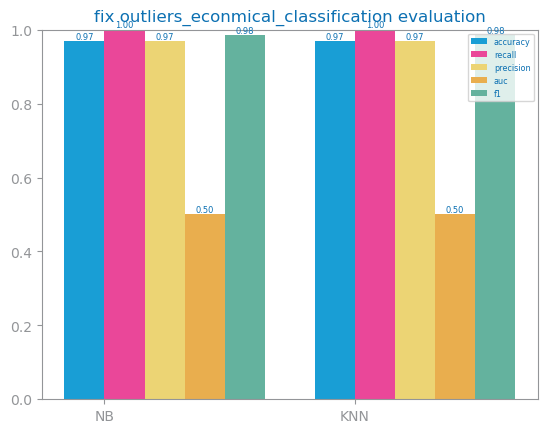

In [10]:
from matplotlib.pyplot import savefig, show, figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from utils.dslabs_functions import plot_multibar_chart, evaluate_approach

train, test = train_test_split(df, test_size=0.2, random_state=42)
# scale train and test data
scaler = MinMaxScaler()
train = DataFrame(scaler.fit_transform(train), columns=train.columns)
test = DataFrame(scaler.transform(test), columns=test.columns)


file_tag = "fix outliers_econmical_classification"
figure()
eval: dict[str, list] = evaluate_approach(train, test, target=e_target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
print(f"Evaluation of the models for the {file_tag} dataset")
print("evaluation for " + str(["NB", "KNN"]))
print(eval)
path = f"{IMAGE_FOLDER}/{file_tag}_eval.png"
if not Path(path).exists():
    savefig(path)
show()

### Turnicate outliers

In [11]:

if [] != numeric_vars:
    df: DataFrame = data.copy(deep=True)
    for var in numeric_vars:
        top, bottom = determine_outlier_thresholds_for_var(summary5[var])
        df[var] = df[var].apply(
            lambda x: top if x > top else bottom if x < bottom else x
        )
    # df.to_csv(f"data/{file_tag}_truncate_outliers.csv", index=True)
    print("Data after truncating outliers:", df.shape)
else:
    print("There are no numeric variables")

if [] == numeric_vars:
    exit()
df.describe()

Data after truncating outliers: (5030, 20)


,PD_CD,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Latitude,Longitude,CLASS__security,YEAR,MONTH,DAY_OF_WEEK,IS_WEEKEND,DAY_OF_YEAR_sin,DAY_OF_YEAR_cos
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000
mean,486.807555,260.552303,10.352773,48.206924,0.294433,1.810934,61.006362,0.470458,1.780931,0.815507,1.423675,40.743359,-73.921980,0.973559,2012.434801,6.283499,2.864414,0.222068,0.039615,-0.033662
std,254.492705,114.360315,7.474294,52.591644,0.455833,1.522105,34.332025,2.278508,0.847386,0.387924,0.939344,0.083076,0.065632,0.160460,4.235909,3.360424,1.812417,0.415678,0.717964,0.694312
min,101.000000,101.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.050514,0.000000,0.000000,40.502746,-74.068711,0.000000,2006.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000
25%,259.000000,121.000000,4.000000,10.000000,0.000000,0.000000,33.000000,0.000000,1.000000,1.000000,1.000000,40.679981,-73.966358,1.000000,2009.000000,3.000000,1.000000,0.000000,-0.686000,-0.716000
50%,503.000000,235.000000,8.000000,24.000000,0.000000,1.000000,60.000000,0.000000,2.000000,1.000000,1.000000,40.741776,-73.924718,1.000000,2012.000000,6.000000,3.000000,0.000000,0.120000,-0.060000
75%,661.000000,346.000000,15.000000,65.000000,1.000000,3.000000,84.000000,0.000000,2.000000,1.000000,2.000000,40.816324,-73.884793,1.000000,2016.000000,9.000000,4.000000,0.000000,0.757000,0.641000
max,969.000000,569.681499,27.923680,184.345254,1.000000,4.000000,123.000000,19.786503,3.511315,1.000000,3.701176,41.298574,-73.777348,1.000000,2020.919553,12.000000,6.000000,1.000000,1.000000,1.000000


Evaluation of the models for the security_truncate_outliers dataset
evaluation for ['NB', 'KNN']
{'accuracy': [0.9781312127236581, 0.974155069582505], 'recall': [1.0, 1.0], 'precision': [0.9779338014042126, 0.974025974025974], 'auc': [0.6451612903225806, 0.5806451612903225], 'f1': [0.9888438133874239, 0.9868421052631579]}


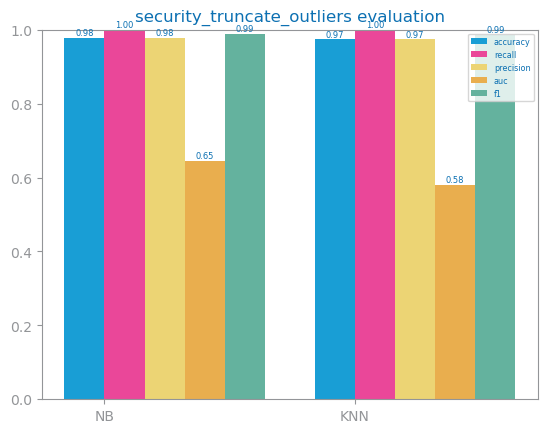

In [12]:
from matplotlib.pyplot import savefig, show, figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from utils.dslabs_functions import plot_multibar_chart, evaluate_approach

train, test = train_test_split(df, test_size=0.2, random_state=42)
# scale train and test data
scaler = MinMaxScaler()
train = DataFrame(scaler.fit_transform(train), columns=train.columns)
test = DataFrame(scaler.transform(test), columns=test.columns)


file_tag = "security_truncate_outliers"
figure()
eval: dict[str, list] = evaluate_approach(train, test, target=e_target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
print(f"Evaluation of the models for the {file_tag} dataset")
print("evaluation for " + str(["NB", "KNN"]))
print(eval)
path = f"{IMAGE_FOLDER}/{file_tag}_eval.png"
if not Path(path).exists():
    savefig(path)
show()

### concolusion for the security data set
Comparing no handling, dropping, fixed-value replacement, and truncation: 

None of the outlier handling methods gave any significant improvement in the model performance. Therefore, we can conclude that the security data set does not have any outliers and we stick with the original data set.